<a href="https://colab.research.google.com/github/oyyarko/opencv_arko/blob/master/tensorflow_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.chdir('/content/drive/My Drive/Deep Learning Cloud/models/research/object_detection')

In [0]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,818 kB of archives.
After this operation, 7,685 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd

In [0]:
!cd /content/drive/My Drive/Deep Learning Cloud/models/research
!mkdir train eval

/bin/bash: line 0: cd: too many arguments
mkdir: cannot create directory ‘train’: File exists
mkdir: cannot create directory ‘eval’: File exists


In [3]:
#!cd /content/drive/My Drive/Deep Learning Cloud/bin /content/drive/My Drive/Deep Learning Cloud/models/research/object_detection/protos/*.proto --python_out=.
#!protoc object_detection/protos/*.proto --python_out=.
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

env: PYTHONPATH=/content/models/research:/content/models/research/slim


In [0]:
os.chdir('/content/drive/My Drive/Deep Learning Cloud/models/research/')
!protoc object_detection/protos/*.proto --python_out=.

In [5]:
%set_env PYTHONPATH=/content/drive/My Drive/Deep Learning Cloud/models/research:/content/drive/My Drive/Deep Learning Cloud/models/research/slim

env: PYTHONPATH=/content/drive/My Drive/Deep Learning Cloud/models/research:/content/drive/My Drive/Deep Learning Cloud/models/research/slim


In [1]:
!pip install tensorflow==1.4.0

     |████████████████████████████████| 41.2MB 75kB/s 
     |████████████████████████████████| 1.7MB 40.7MB/s 
     |████████████████████████████████| 890kB 51.9MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=bf487f4b5a030c15b28b6a4268eeda3a2741c4c551e97c8ac44db7cbd26378c4
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.4
    Uninstalling bleach-3.1.4:
      Successfully uninstalled bleach-3.1.4
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [6]:
%tensorflow_version 1.x
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import defaultdict
from io import StringIO
from PIL import Image
import sys

sys.path.append('..')
from object_detection.utils import ops as utils_ops

TensorFlow 1.x selected.


In [7]:
tf.__version__

'1.15.2'

In [8]:
#from protos import string_int_label_map_pb2
from object_detection.utils import label_map_util

from utils import visualization_utils as vis_util

/content/drive/My Drive/Deep Learning Cloud/models/research/object_detection/utils/visualization_utils.py:29: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  import matplotlib; matplotlib.use('Agg')  # pylint: disable=multiple-statements


In [0]:
import tarfile
from io import StringIO
import six.moves.urllib as urllib
from collections import defaultdict

#http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2018_01_28.tar.gz

MODEL_NAME = 'ssd_mobilenet_v1_coco_2018_01_28'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

In [0]:
graph = tf.Graph()
graph_def = tf.compat.v1.GraphDef()

In [0]:
opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)

for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [0]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [0]:
def convert_img_to_numpy(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(im_width, im_height, 3).astype(np.uint8)

In [0]:
os.chdir('/content/drive/My Drive/Deep Learning Cloud/models/research/testimages')

In [15]:
#!wget https://res.cloudinary.com/traveltripperweb/image/upload/c_fit,h_1200,w_1200/v1574859574/zj1vebu2d6xxjcrswjre.jpg
!wget https://www.iamexpat.nl/sites/default/files/styles/article--full/public/amsterdam-netherlands_2_0.jpg?itok=cGC8O9yr
!wget https://images.pexels.com/photos/109919/pexels-photo-109919.jpeg
!wget https://ak1.ostkcdn.com/images/products/11322041/Jedidiah-Acacia-Wood-Computer-Desk-by-Christopher-Knight-Home-24d413c5-986e-46db-8c04-0b946fef57da_1000.jpg?
!wget https://inteng-storage.s3.amazonaws.com/img/iea/4N610VqxGJ/sizes/cat-cloning_resize_md.jpg
!wget https://m.jagranjosh.com/imported/images/E/Articles/how-national-highway-named.jpg
!wget https://statics.sportskeeda.com/wp-content/uploads/2016/07/cricket-football-1468476690-800.jpg
!wget https://media1.popsugar-assets.com/files/thumbor/rBMlH6V8K60z3QklV_TF1ZfJc-s/fit-in/2048xorig/filters:format_auto-!!-:strip_icc-!!-/2018/07/17/968/n/1922729/479df6855b4e6a263402a0.48863077_/i/Worst-Fruits-Weight-Loss.jpg

--2020-04-04 10:07:39--  https://www.iamexpat.nl/sites/default/files/styles/article--full/public/amsterdam-netherlands_2_0.jpg?itok=cGC8O9yr
Resolving www.iamexpat.nl (www.iamexpat.nl)... 95.217.181.116, 159.69.245.13
Connecting to www.iamexpat.nl (www.iamexpat.nl)|95.217.181.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200412 (196K) [image/jpeg]
Saving to: ‘amsterdam-netherlands_2_0.jpg?itok=cGC8O9yr’

amsterdam-netherlan 100%[===================>] 195.71K   502KB/s    in 0.4s    

2020-04-04 10:07:40 (502 KB/s) - ‘amsterdam-netherlands_2_0.jpg?itok=cGC8O9yr’ saved [200412/200412]

Object `jpeg` not found.
Object `b946fef57da_1000.jpg` not found.
--2020-04-04 10:07:42--  https://inteng-storage.s3.amazonaws.com/img/iea/4N610VqxGJ/sizes/cat-cloning_resize_md.jpg
Resolving inteng-storage.s3.amazonaws.com (inteng-storage.s3.amazonaws.com)... 52.218.109.146
Connecting to inteng-storage.s3.amazonaws.com (inteng-storage.s3.amazonaws.com)|52.218.109.146|:443..

--2020-04-04 10:10:30--  https://images.pexels.com/photos/109919/pexels-photo-109919.jpeg
Resolving images.pexels.com (images.pexels.com)... 104.17.208.102, 104.17.209.102, 2606:4700::6811:d166, ...
Connecting to images.pexels.com (images.pexels.com)|104.17.208.102|:443... connected.
HTTP request sent, awaiting response... 503 Service Temporarily Unavailable
2020-04-04 10:10:30 ERROR 503: Service Temporarily Unavailable.



In [45]:
PATH_TO_TEST_IMAGES = '/content/drive/My Drive/Deep Learning Cloud/models/research/testimages'
TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES, 'image{}.jpg'.format(i)) for i in range(1, 7)]

ERROR! Session/line number was not unique in database. History logging moved to new session 66


In [0]:
IMAGE_SIZE = (12, 8)

In [39]:
!pip install matplotlib==3.0.1

     |████████████████████████████████| 12.9MB 3.1MB/s 
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.1 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.1
    Uninstalling matplotlib-3.2.1:
      Successfully uninstalled matplotlib-3.2.1


In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
    # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')
        # Run inference
      output_dict = sess.run(tensor_dict, feed_dict={image_tensor: np.expand_dims(image, 0)})
        # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict['detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

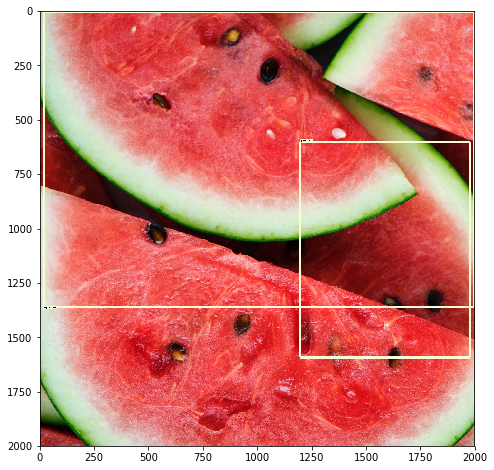

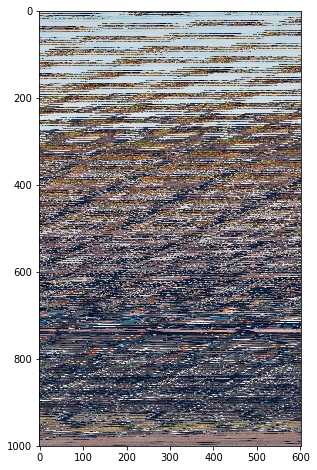

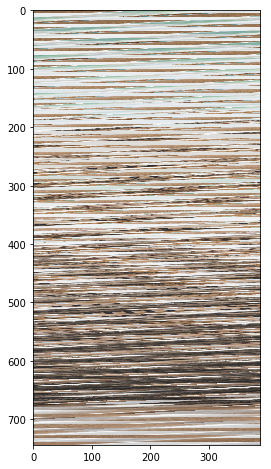

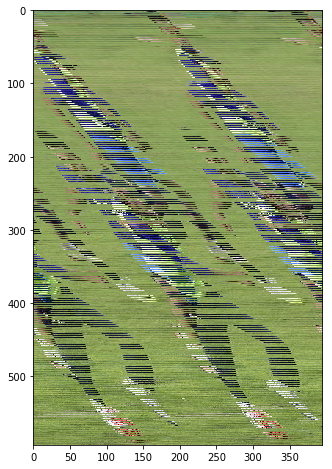

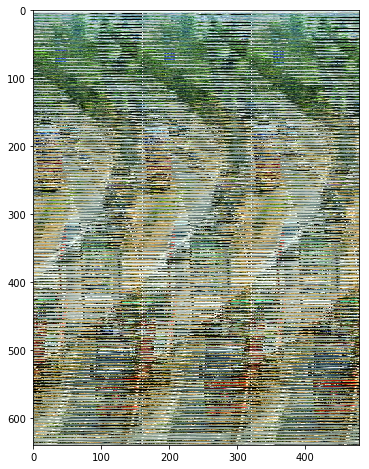

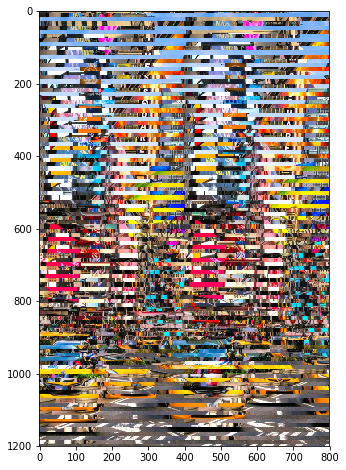

In [44]:
for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    image_np = convert_img_to_numpy(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=10)
    plt.figure(figsize=(12,8))
    plt.imshow(image_np)